<a href="https://colab.research.google.com/github/Maheklalwani27/Bike-Sharing-Demand-Predictions/blob/main/Copy_1_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **SOLUTION**

## Bike rentals are a brilliant idea for any bike enthusiast. The bike rent provides an excellent and convenient way to navigate around town and exploring the adventure. Bike rental comes with a range of benefits

### ->It enhances Convenience

### ->Improve your Navigation Skills

### ->And many more

## **MODELS APPLIED:**

### This notebook discusses a Linear Regression Model and a Decision Tree Regression Model for hourly rental bike demand prediction.

## **Let's import the usual suspects.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/SeoulBikeData.csv'
df=pd.read_csv(file_path, encoding='iso-8859-1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## **FINDINGS** 

### There are no null values in our dataset.

### By this, we can say the dataset is balanced.

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Exploratory Data Analysis**

### **NOW WE CAN EXPLORE OUR FEATURES**.

In [ ]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

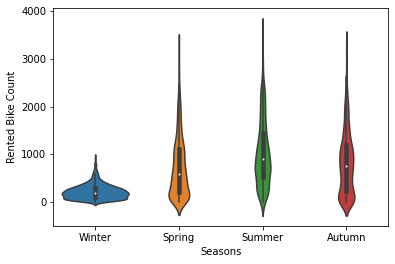

In [ ]:
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df)

## **FINDINGS**:

### Most of the bikes has been rented during Summer as compared to other seasons.

### And the least number of bikes rented during Winter (probably due to snowfall).

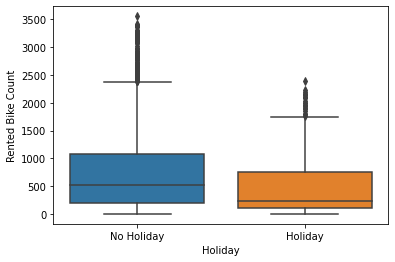

In [ ]:
df.Holiday.value_counts()
sns.boxplot(x='Holiday',y = 'Rented Bike Count',data=df)


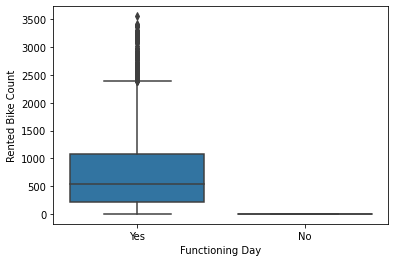

In [ ]:
sns.boxplot(x='Functioning Day',y = 'Rented Bike Count',data=df)

## **FINDINGS**

### Majority of data is for non holiday days.

### Majority of data is for Functioning days.

> Indented block



## **CORRELATION**

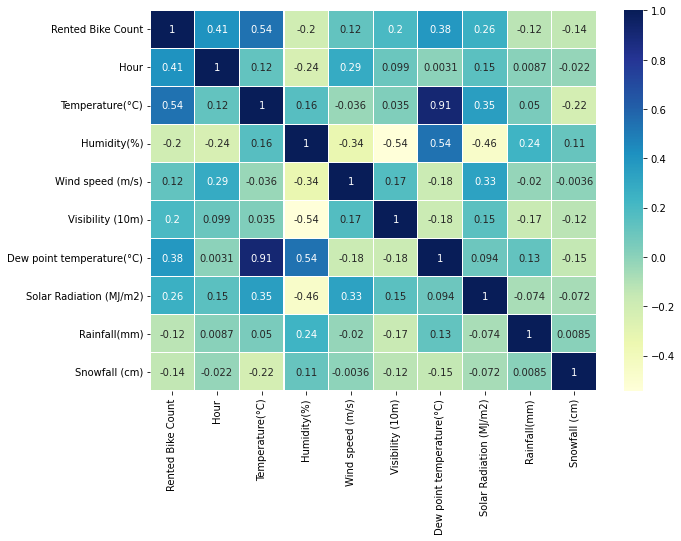

In [ ]:
plt.figure(figsize = (10,7))
tc = df.corr()
sns.heatmap(tc, annot = True, cmap = 'YlGnBu', linecolor = 'white', linewidths=0.1)

## **FINDINGS**:

### Rented bike count is highly correlated with Hour.

### Temperature in Celsius is highly correlated with Dew point temperature - Celsius

<Figure size 720x288 with 0 Axes>

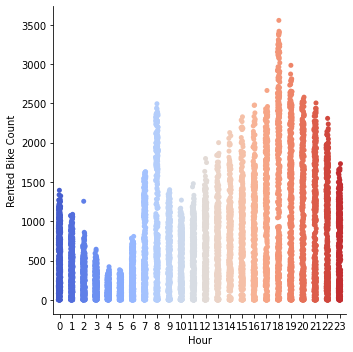

In [ ]:
plt.figure(figsize = (10,4))
sns.catplot(x = 'Hour', y = 'Rented Bike Count', data = df, estimator=np.average, palette='coolwarm')

## **FINDINGS**:

### We can clearly see that demand is declining from 0 to 5th hour and then again therr is rise in demand from 6th to 8th hour.

### Highest demand is in 17th hour.

## **Let us now split the date column into 'days' ,'months' and 'years'**

In [ ]:
from datetime import datetime
import datetime as dt

In [ ]:
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


### **Lets have a look at graphical representation of our new columns namely "year" , "month" , "day"**

PuRd_r  Spectral'

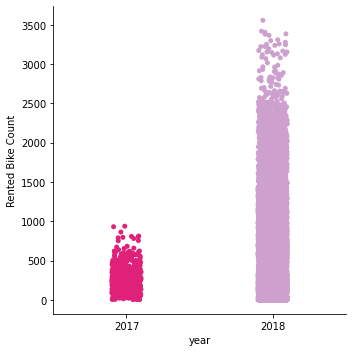

In [ ]:
sns.catplot(x='year', y='Rented Bike Count', data=df , palette = 'PuRd_r')

## **FINDINGS:**

### In general, the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2017.

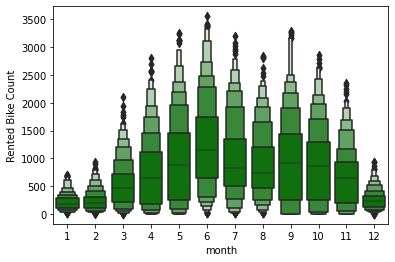

In [ ]:
sns.boxenplot(x="month", y="Rented Bike Count",
              color="g", scale="linear", data=df)

## **FINDINGS:**

### From the above bar plot we can clearly say that the demand of the rented bikes is comparatively high for the months 5-10(May-October) than other months.

### Also, we can see that these months are a part of summer season.

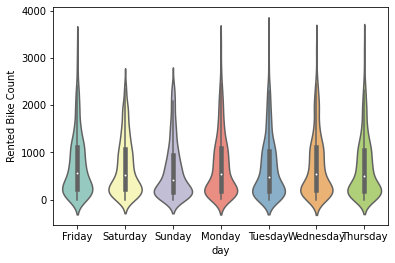

In [ ]:
sns.violinplot(x='day', y='Rented Bike Count', data=df , palette="Set3")

## **FINDINGS:**

###Rented Bike count is more on week days as compared to weekends

In [ ]:
df.drop(['Date'] , axis = 1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


## ***EDA Continued:***

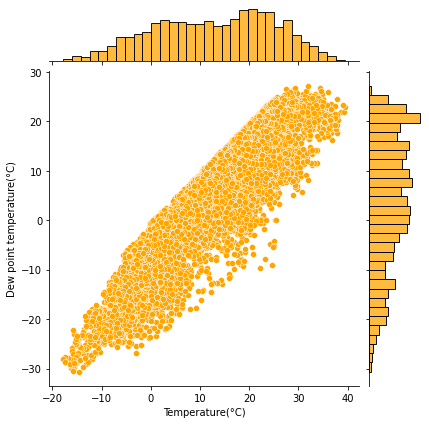

In [ ]:

sns.jointplot(data=df, x='Temperature(°C)', y='Dew point temperature(°C)' , color = 'orange')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


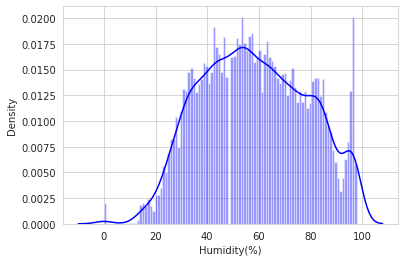

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['Humidity(%)'], bins = 100, color = 'blue') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


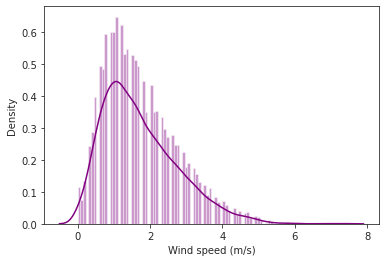

In [ ]:
sns.set_style('ticks')
sns.distplot(df['Wind speed (m/s)'], bins = 100, color = 'purple')
plt.show()

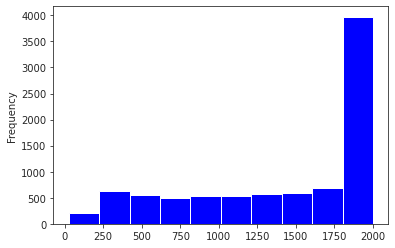

In [ ]:
df['Visibility (10m)'].plot(kind='hist' , color = 'blue')
plt.show()

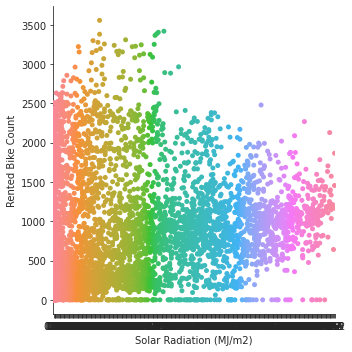

In [ ]:
sns.catplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count',data=df) 

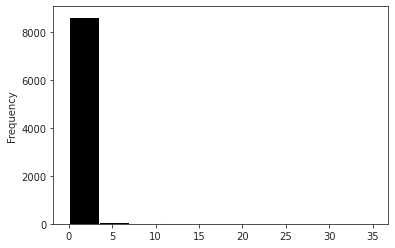

In [ ]:
df['Rainfall(mm)'].plot(kind='hist', color = 'black')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


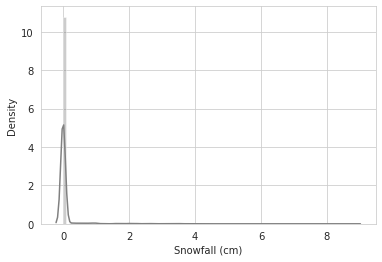

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['Snowfall (cm)'], bins = 100, color = 'gray') 
plt.show()

## **OBSERVATION FROM EDA:**

### Booking are mostly high during summers.

### There are more bookings on non-holiday days & Functioning days.

### Wind speed is not that much extreme.

### Snowfall is mostly between 0-1 cm and not that extreme in most cases.

### Humidity is also moderate but still on warmer side.

## **Analysis baesd on Numerical Variables Vs Rented Bike Count**

<Figure size 576x432 with 0 Axes>

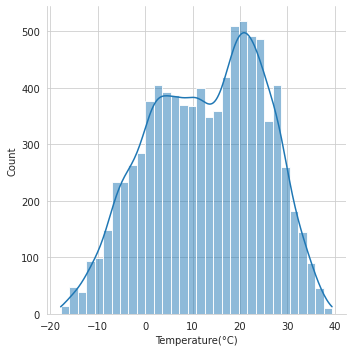

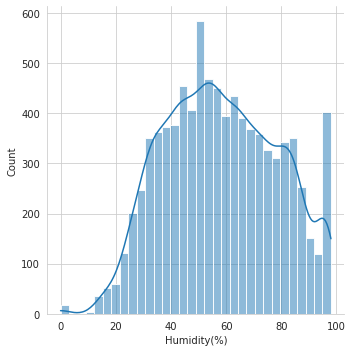

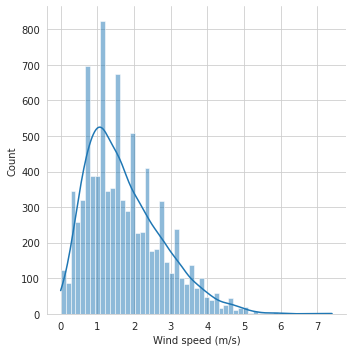

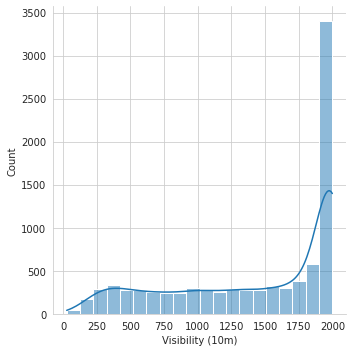

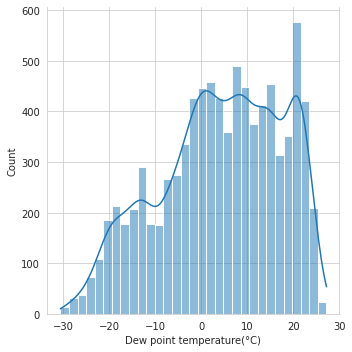

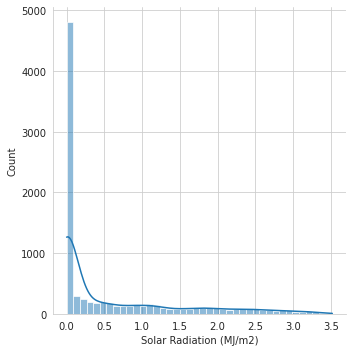

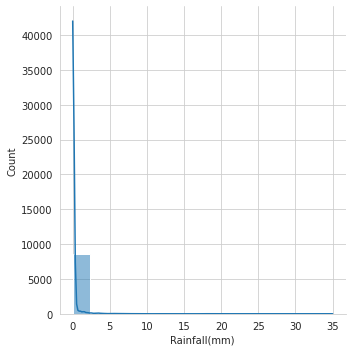

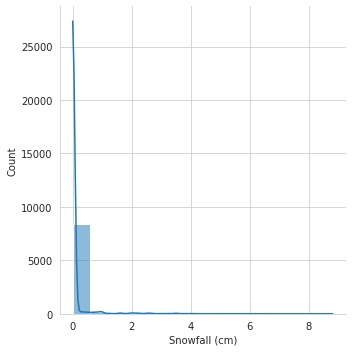

In [ ]:
plt.figure(figsize=(8,6))
lis=['Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for i in lis:
  sns.displot(df[i],kde=True)

## **FINDINGS (based on above analysis)**

### It is clear that people rent bikes when it is pretty hot around (30°C on average).

### The dew_point_temperature follows a similar pattern as Temperature

### The number of rented bikes is huge, when there is solar radiation, the count of rented bikes has a mean around 1000

###  There is a fluctuation in the demand of rented bikes as far as rainfall is concerned, here e.g even if there is 22 mm of rain there is a big peak of rented bikes.

### We can see from the above plot that the demand of rented bike is nearly uniformly distributed despite wind speed.

## **DATA PREPARATIONS:**

### 1) One-Hot Encoding
Let's do one-hot encoding of 'Seasons' , 'Holiday' and 'Functioning Day'.

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns = ['Seasons',	'Holiday','Functioning Day'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,month,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,12,Friday,0,0,0,1,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,12,Friday,0,0,0,1,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,12,Friday,0,0,0,1,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,12,Friday,0,0,0,1,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,12,Friday,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,11,Friday,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,11,Friday,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,11,Friday,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,11,Friday,1,0,0,0,0,1,0,1


In [ ]:
df = pd.get_dummies(df, columns = ['year', 'month', 'day'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0


## **Linear Regression Model**


### **Importing necessary libraries for Model that we are going to use.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

## **Method**

### From bikedata, we create a new Dataframe X containing all the columns except Rented Bike Count and a Series y containing only the Rented Bike Count column. These will be our design matrix and target respectively for our linear regression model.

###We perform a test-train split to create X_train, X_test, y_train and y_test.

### The rental bike data is therefore partitioned into two namely, training set for building the regression and testing set for assessing the model performance. Usually larger part of data is need to teach the models and so the 75% of the final data is utilized for model training and the remaining 25%of the data is used for testing purpose

In [ ]:
X = df.drop(columns=['Rented Bike Count', 'Date'])
y = df['Rented Bike Count']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [ ]:
df.drop(['Date'], axis = True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score: {}'.format(model.score(X_train , y_train)))

    predictions = model.predict(X_test)
    print('Predictions are:{}'.format(predictions))

    print('\n')

    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is:{}'.format(r2_score))

    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

## **Report:**

### We compute and print the values of the following parameters:

### Root Mean Squared Error (RMSE),
### Mean Absolute Error (MAE),
### Mean Squared Erroe (MSE),
### Rsquared (R2).

Training score: 0.5896575385874709
Predictions are:[-110.0722944   828.41099743  556.26489121 ...  586.01609957  646.2526204
 1037.15596875]


r2 score is:0.6057877371763416
MAE 307.60872837668586
MSE 166341.46055683264
RMSE 17.53877784729272


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


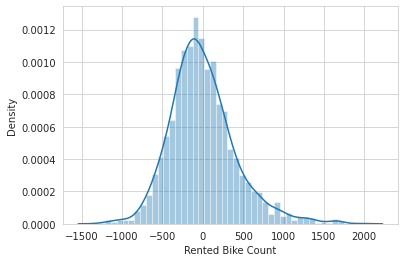

In [ ]:
predict(LinearRegression())

## **TESTING OF LINEAR REGRESSION MODEL**


## **We produce the following plots:**

### 1) A scatter plot of the residual as a function of the testing set. We use the colormap 'RdBu' to plot the different hours in different colours.

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
resid = y_test - y_pred

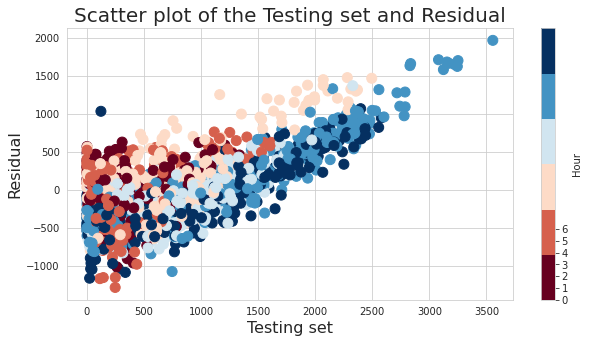

In [ ]:
t = X_test['Hour']

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, resid,c=t,s=100, cmap=plt.cm.get_cmap('RdBu', 6,))
plt.colorbar(ticks=range(7), label='Hour')
plt.title('Scatter plot of the Testing set and Residual', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Residual', fontsize=16)

plt.show()

### **2) We produce two histograms on the same plot, one showing the training set, the other showing the testing set**

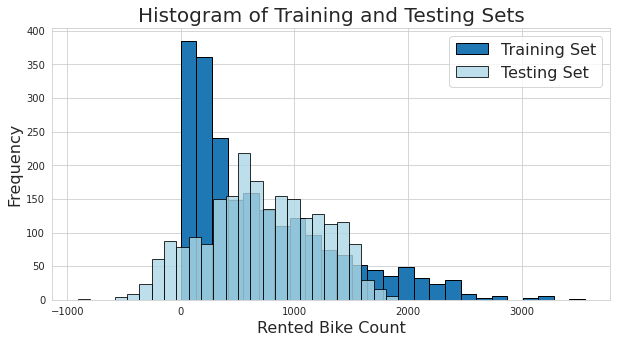

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.hist(y_test, bins=26, edgecolor='black', label='Training Set')
plt.hist(y_pred, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=20)
plt.xlabel('Rented Bike Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=16)

plt.show()

Training score: 1.0
Predictions are:[ 196.  567.  282. ...  560.  473. 1577.]


r2 score is:0.843379375339354
MAE 142.15981735159818
MSE 66087.50136986302
RMSE 11.923079189185911


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


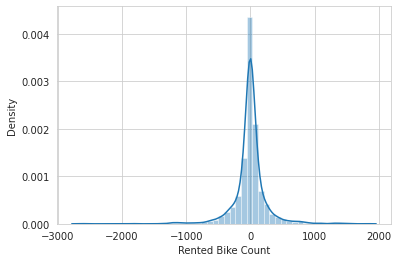

## **Decision Tree Regression Model**

### We create and train a Decision Tree Regressor with max_depth=6. Then, by using X_train, X_test, y_train and y_test we computed for the Linear Regression test, we predict the test data y_pred_tree by using the Deciosion Tree Regressor.

### We also compute the residual for this model, which we call resid_tree.

## **Report:**
### We compute and print the values of the following parameters for the Decision Tree Regression Model:

### Root Mean Squared Error (RMSE),
### Mean Absolute Error (MAE),
### Rsquared (R2).

Training score: 1.0
Predictions are:[ 210.  680.  301. ...  504.  473. 1101.]


r2 score is:0.8471263093033058
MAE 141.3835616438356
MSE 64506.448401826485
RMSE 11.890481976935822


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


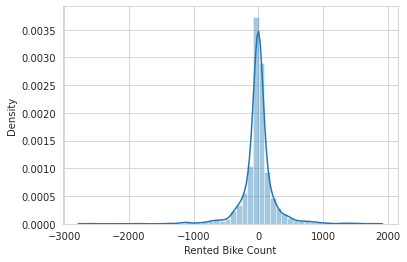

In [ ]:
predict(DecisionTreeRegressor())

## **TESTING OUR DECISION TREE MODEL**

In [ ]:
regr_tree = DecisionTreeRegressor(max_depth=6)

In [ ]:
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [ ]:
y_pred_tree = regr_tree.predict(X_test)


In [ ]:
resid_tree = y_test - y_pred_tree

## **Plot**

### We produce two histograms on the same plot, one showing the training set, the other showing the testing set for the Decision Tree Regression Model

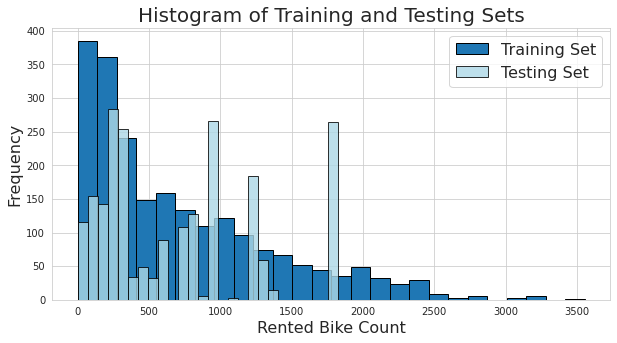

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.hist(y_test, bins=26, edgecolor='black', label='Training Set')
plt.hist(y_pred_tree, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=20)
plt.xlabel('Rented Bike Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=16)

plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

## **Plot**

### We produce scatter plot for this model.

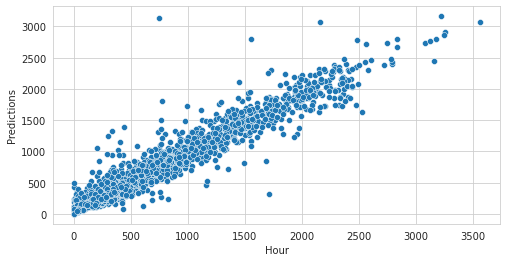

In [ ]:
plt.figure(figsize = (8,4))
pred = rfr.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Hour')
plt.ylabel('Predictions')
plt.show()

### The variability between the actual values and the predicted values is lesser than the linear regression.

# **THANK YOU** 